In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA

In [2]:
data_2d = pd.read_csv('data/data_2d.csv')
mnist = pd.read_csv('data/mnist.csv')

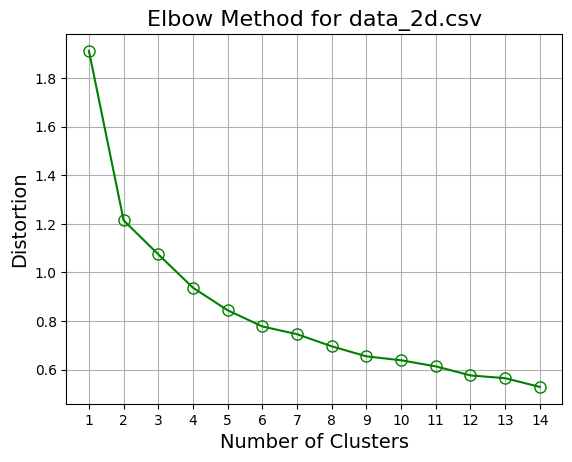

In [45]:
# Elbow Method for data_2d.csv

X_2d = data_2d.values

dist_2d = []
max_clusters_2d = 15

for k in range(1, max_clusters_2d):
    kmeans_2d = KMeans(n_clusters=k, random_state=42).fit(X_2d)
    dist_2d.append(sum(np.min(pairwise_distances(X_2d, kmeans_2d.cluster_centers_, metric='euclidean'), axis=1)) / X_2d.shape[0])

plt.plot(range(1, max_clusters_2d), dist_2d, marker='o', color='g', markersize=8, markerfacecolor='none')
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Distortion', fontsize=14)
plt.title('Elbow Method for data_2d.csv', fontsize=16)
plt.xticks(range(1, max_clusters_2d))
plt.grid(True)
plt.show()

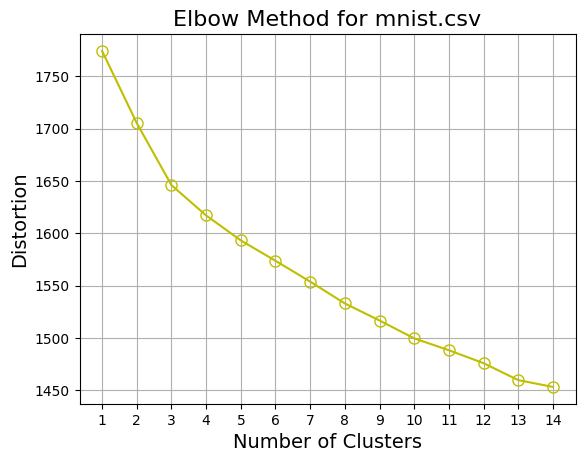

In [49]:
#Elbow Method for mnist.csv

X_mnist = mnist.values

dist_mnist = []
max_clusters_mnist = 15

for k in range(1, max_clusters_mnist):
    kmeans_mnist = KMeans(n_clusters=k, random_state=42)
    kmeans_mnist.fit(X_mnist)
    dist_mnist.append(sum(np.min(pairwise_distances(X_mnist, kmeans_mnist.cluster_centers_, metric='euclidean'), axis=1)) / X_mnist.shape[0])


plt.plot(range(1, max_clusters_mnist), dist_mnist, marker='o', color='y', markersize=8, markerfacecolor='none')
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Distortion', fontsize=14)
plt.title('Elbow Method for mnist.csv', fontsize=16)
plt.xticks(range(1, max_clusters_mnist))
plt.grid(True)
plt.show()

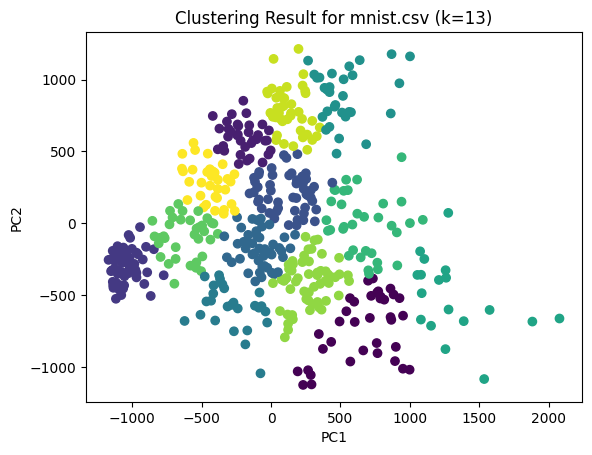

In [56]:
# Clastering for mnist.csv

pca = PCA(n_components=2)
X_mnist_pca = pca.fit_transform(X_mnist)

best_k = np.argmin(dist_mnist) 
kmeans_mnist = KMeans(n_clusters=best_k, random_state=42)
kmeans_mnist.fit(X_mnist_pca)
labels = kmeans_mnist.labels_

plt.scatter(X_mnist_pca[:, 0], X_mnist_pca[:, 1], c=labels, )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'Clustering Result for mnist.csv (k={best_k})')
plt.show()